In [1]:
#Importing all the required libraries.
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#checking for null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


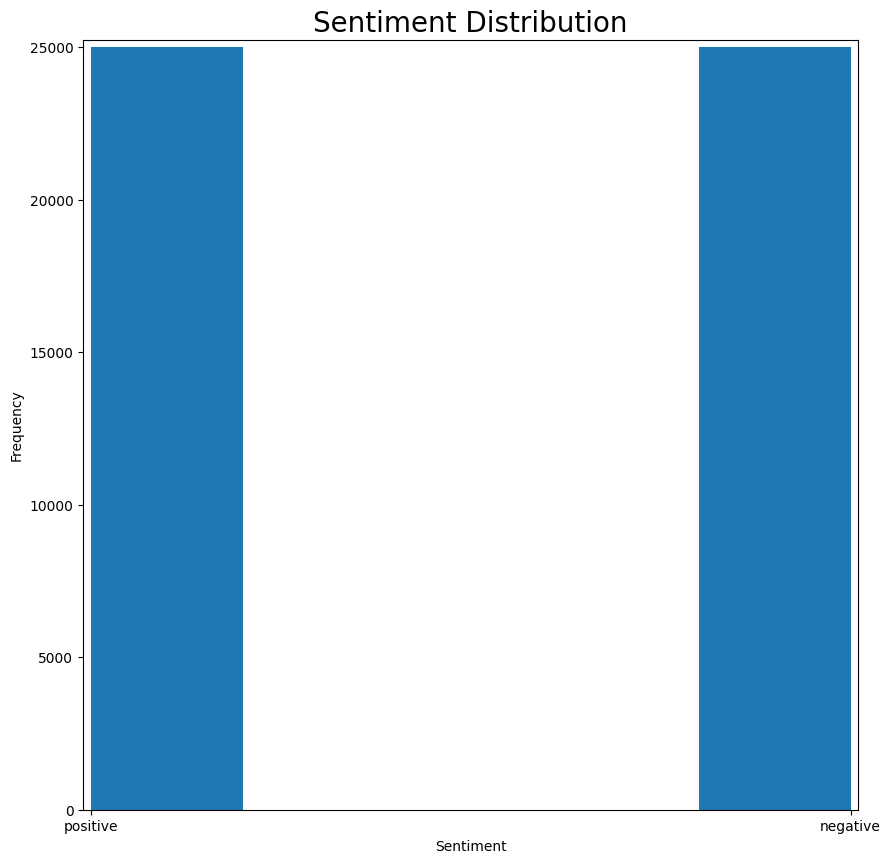

In [5]:
#Checking the distribution of target value using histogram
df = data['sentiment']
plt.figure(figsize=(10,10))
plt.margins(0.01)
plt.xlabel('Sentiment', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.hist(df, bins=5)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [23]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [8]:
#Removing Special Characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
data['review']=data['review'].apply(remove_special_characters)

In [9]:
#Stemming the text
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(stemmer)

In [10]:
#Setting Stop Words
stop = set(stopwords.words('english'))

#Removing Stop Words
def remove_stop_word(text,is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case : 
        filtered_token = [token for token in tokens if token not in stopword_list]
    else:
        filtered_token = [token for token in tokens if token.lower() not in stopword_list]
        filtered_text = ' '.join(filtered_token)
        return filtered_text
#Apply the function on the dataset
data['review'] = data['review'].apply(remove_stop_word)

In [11]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(data['review'],data['sentiment'],test_size = 0.2,random_state = 42)

In [12]:
#Converting the text to vectors
vectorize = CountVectorizer()
X_train_vec = vectorize.fit_transform(X_train)
X_test_vec = vectorize.transform(X_test)

In [21]:
#Using Support Vector Classifier to Do the predictions
classifier = LinearSVC(max_iter=3000,dual=False)
#Training
classifier.fit(X_train_vec,y_train)

LinearSVC(dual=False, max_iter=3000)

In [24]:
predict = classifier.predict(X_test_vec)

In [25]:
accuracy = accuracy_score(y_test,predict)
print('Accuracy :' ,accuracy)

Accuracy : 0.8678
